In [2]:
import pandas as pd
import spacy
#from spacy.lang.en.stop_words import STOP_WORDS
#import time
from spacytextblob.spacytextblob import SpacyTextBlob
import matplotlib.pyplot as plt

In [3]:
nlp = spacy.load("en_core_web_sm")

In [4]:
sds_text = pd.read_csv('../data/sds_text.csv')

In [5]:
sds_text

,Unnamed: 0,episode_name,length_episode,context_episode,guest_name,guest_info,text_episode,episode_number,episode_date,episode_day,host_episode,speaker,episode_split_text
0,0,"Ruben Kogel on Self-Serve Analytics, R vs Pyt...",42,Business Data Science Database,Ruben Kogel,"Subscribe on Website, Apple Podcasts, Spotify,...",Kirill: This is episode number one with ex-che...,1,"Sep 10, 2016",Saturday,Kirril Eremenko,Kirill,This is episode number one with ex-chemical e...
1,0,"Ruben Kogel on Self-Serve Analytics, R vs Pyt...",42,Business Data Science Database,Ruben Kogel,"Subscribe on Website, Apple Podcasts, Spotify,...",Kirill: This is episode number one with ex-che...,1,"Sep 10, 2016",Saturday,Kirril Eremenko,Kirill,"Hey guys, welcome to the Podcast. I’ve got Ru..."
2,0,"Ruben Kogel on Self-Serve Analytics, R vs Pyt...",42,Business Data Science Database,Ruben Kogel,"Subscribe on Website, Apple Podcasts, Spotify,...",Kirill: This is episode number one with ex-che...,1,"Sep 10, 2016",Saturday,Kirril Eremenko,Ruben,Thank you! Thanks for having me over. I’m doi...
3,0,"Ruben Kogel on Self-Serve Analytics, R vs Pyt...",42,Business Data Science Database,Ruben Kogel,"Subscribe on Website, Apple Podcasts, Spotify,...",Kirill: This is episode number one with ex-che...,1,"Sep 10, 2016",Saturday,Kirril Eremenko,Kirill,Awesome. It’s great to hear you and for those...
4,0,"Ruben Kogel on Self-Serve Analytics, R vs Pyt...",42,Business Data Science Database,Ruben Kogel,"Subscribe on Website, Apple Podcasts, Spotify,...",Kirill: This is episode number one with ex-che...,1,"Sep 10, 2016",Saturday,Kirril Eremenko,Ruben,"Yeah sure. So, I’m the senior manager of anal..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
46767,681,"Contextual A.I. for Adapting to Adversaries, ...",81,Data Science Artificial Intelligence,Matar Haller,"Subscribe on Website, Apple Podcasts, Spotify,...",Jon Krohn:\t00:00:05\tThis is episode number 6...,683,"May 30, 2023",Tuesday,Jon Krohn,Jon Krohn,"Yeah, right. Yeah, as I mean, it actually, it ..."
46768,681,"Contextual A.I. for Adapting to Adversaries, ...",81,Data Science Artificial Intelligence,Matar Haller,"Subscribe on Website, Apple Podcasts, Spotify,...",Jon Krohn:\t00:00:05\tThis is episode number 6...,683,"May 30, 2023",Tuesday,Jon Krohn,Matar Haller,Happy to.
46769,681,"Contextual A.I. for Adapting to Adversaries, ...",81,Data Science Artificial Intelligence,Matar Haller,"Subscribe on Website, Apple Podcasts, Spotify,...",Jon Krohn:\t00:00:05\tThis is episode number 6...,683,"May 30, 2023",Tuesday,Jon Krohn,Jon Krohn,"Nice. Well, yeah, so you mentioned potentially..."
46770,681,"Contextual A.I. for Adapting to Adversaries, ...",81,Data Science Artificial Intelligence,Matar Haller,"Subscribe on Website, Apple Podcasts, Spotify,...",Jon Krohn:\t00:00:05\tThis is episode number 6...,683,"May 30, 2023",Tuesday,Jon Krohn,Matar Haller,Thank you for having me. This was fascinating ...


In [6]:
sds_text = sds_text.set_index('Unnamed: 0')

In [7]:
nlp.components

[('tok2vec', <spacy.pipeline.tok2vec.Tok2Vec at 0x7fe6081c9100>),
 ('tagger', <spacy.pipeline.tagger.Tagger at 0x7fe6081c9220>),
 ('parser', <spacy.pipeline.dep_parser.DependencyParser at 0x7fe5f03ad350>),
 ('senter', <spacy.pipeline.senter.SentenceRecognizer at 0x7fe6081c9400>),
 ('attribute_ruler',
  <spacy.pipeline.attributeruler.AttributeRuler at 0x7fe6081bb500>),
 ('lemmatizer',
  <spacy.lang.en.lemmatizer.EnglishLemmatizer at 0x7fe5f0516880>),
 ('ner', <spacy.pipeline.ner.EntityRecognizer at 0x7fe5f03ad740>)]

In [8]:
nlp.add_pipe("spacytextblob")

In [9]:
nlp.components

[('tok2vec', <spacy.pipeline.tok2vec.Tok2Vec at 0x7fe6081c9100>),
 ('tagger', <spacy.pipeline.tagger.Tagger at 0x7fe6081c9220>),
 ('parser', <spacy.pipeline.dep_parser.DependencyParser at 0x7fe5f03ad350>),
 ('senter', <spacy.pipeline.senter.SentenceRecognizer at 0x7fe6081c9400>),
 ('attribute_ruler',
  <spacy.pipeline.attributeruler.AttributeRuler at 0x7fe6081bb500>),
 ('lemmatizer',
  <spacy.lang.en.lemmatizer.EnglishLemmatizer at 0x7fe5f0516880>),
 ('ner', <spacy.pipeline.ner.EntityRecognizer at 0x7fe5f03ad740>),
 ('spacytextblob',
  <spacytextblob.spacytextblob.SpacyTextBlob at 0x7fe5f03acd90>)]

In [ ]:
#sds_1 = sds_text[sds_text['episode_number'] == 1]

In [10]:
def sentiment_analysis(text):
    global sds_text
    doc = nlp(text)
    polarity = doc._.blob.polarity
    #subjectivity = doc._.subjectivity
    #assessment = doc._.assessment
    return polarity

In [11]:
sds_text['sentiments'] = sds_text['episode_split_text'].apply(sentiment_analysis)

In [12]:
sds_text

,episode_name,length_episode,context_episode,guest_name,guest_info,text_episode,episode_number,episode_date,episode_day,host_episode,speaker,episode_split_text,sentiments
Unnamed: 0,,,,,,,,,,,,,
0,"Ruben Kogel on Self-Serve Analytics, R vs Pyt...",42,Business Data Science Database,Ruben Kogel,"Subscribe on Website, Apple Podcasts, Spotify,...",Kirill: This is episode number one with ex-che...,1,"Sep 10, 2016",Saturday,Kirril Eremenko,Kirill,This is episode number one with ex-chemical e...,0.257792
0,"Ruben Kogel on Self-Serve Analytics, R vs Pyt...",42,Business Data Science Database,Ruben Kogel,"Subscribe on Website, Apple Podcasts, Spotify,...",Kirill: This is episode number one with ex-che...,1,"Sep 10, 2016",Saturday,Kirril Eremenko,Kirill,"Hey guys, welcome to the Podcast. I’ve got Ru...",0.566667
0,"Ruben Kogel on Self-Serve Analytics, R vs Pyt...",42,Business Data Science Database,Ruben Kogel,"Subscribe on Website, Apple Podcasts, Spotify,...",Kirill: This is episode number one with ex-che...,1,"Sep 10, 2016",Saturday,Kirril Eremenko,Ruben,Thank you! Thanks for having me over. I’m doi...,0.500000
0,"Ruben Kogel on Self-Serve Analytics, R vs Pyt...",42,Business Data Science Database,Ruben Kogel,"Subscribe on Website, Apple Podcasts, Spotify,...",Kirill: This is episode number one with ex-che...,1,"Sep 10, 2016",Saturday,Kirril Eremenko,Kirill,Awesome. It’s great to hear you and for those...,0.463636
0,"Ruben Kogel on Self-Serve Analytics, R vs Pyt...",42,Business Data Science Database,Ruben Kogel,"Subscribe on Website, Apple Podcasts, Spotify,...",Kirill: This is episode number one with ex-che...,1,"Sep 10, 2016",Saturday,Kirril Eremenko,Ruben,"Yeah sure. So, I’m the senior manager of anal...",0.369388
...,...,...,...,...,...,...,...,...,...,...,...,...,...
681,"Contextual A.I. for Adapting to Adversaries, ...",81,Data Science Artificial Intelligence,Matar Haller,"Subscribe on Website, Apple Podcasts, Spotify,...",Jon Krohn:\t00:00:05\tThis is episode number 6...,683,"May 30, 2023",Tuesday,Jon Krohn,Jon Krohn,"Yeah, right. Yeah, as I mean, it actually, it ...",0.199031
681,"Contextual A.I. for Adapting to Adversaries, ...",81,Data Science Artificial Intelligence,Matar Haller,"Subscribe on Website, Apple Podcasts, Spotify,...",Jon Krohn:\t00:00:05\tThis is episode number 6...,683,"May 30, 2023",Tuesday,Jon Krohn,Matar Haller,Happy to.,0.800000
681,"Contextual A.I. for Adapting to Adversaries, ...",81,Data Science Artificial Intelligence,Matar Haller,"Subscribe on Website, Apple Podcasts, Spotify,...",Jon Krohn:\t00:00:05\tThis is episode number 6...,683,"May 30, 2023",Tuesday,Jon Krohn,Jon Krohn,"Nice. Well, yeah, so you mentioned potentially...",0.320000


In [13]:
sds_text.to_csv('../data/sds_sentiments.csv')

In [14]:
sds_sentiments = pd.read_csv('../data/sds_sentiments.csv')

In [18]:
sds_sentiments['sentiments'].describe()

count    46772.000000
mean         0.189427
std          0.207627
min         -1.000000
25%          0.006677
50%          0.182500
75%          0.300000
max          1.000000
Name: sentiments, dtype: float64

In [23]:
episode_sentiments = pd.DataFrame(sds_text.groupby(['episode_number', 'context_episode', 'episode_date', 'speaker'])['sentiments'].mean()).reset_index()

In [24]:
episode_sentiments

,episode_number,context_episode,episode_date,speaker,sentiments
0,1,Business Data Science Database,"Sep 10, 2016",Kirill,0.294579
1,1,Business Data Science Database,"Sep 10, 2016",Ruben,0.165573
2,2,Machine Learning Data Science,"Sep 14, 2016",Hadelin,0.240974
3,2,Machine Learning Data Science,"Sep 14, 2016",Kirill,0.270224
4,3,Machine Learning R Programming Data Science,"Sep 25, 2016",Kirill,0.207742
...,...,...,...,...,...
836,681,Machine Learning Data Science Python,"May 23, 2023",Matt Harrison,0.213919
837,682,Business Data Science,"May 26, 2023",Jon Krohn,0.150311
838,682,Business Data Science,"May 26, 2023",Mico Yuk,0.133724
839,683,Data Science Artificial Intelligence,"May 30, 2023",Jon Krohn,0.182802


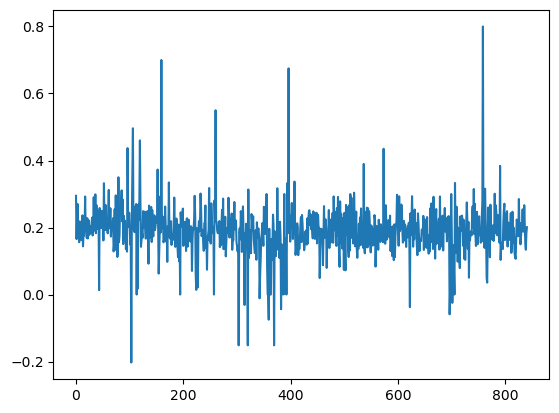

In [33]:
episode_sentiments['sentiments'].plot();

In [25]:
episode_sentiments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 841 entries, 0 to 840
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   episode_number   841 non-null    int64  
 1   context_episode  841 non-null    object 
 2   episode_date     841 non-null    object 
 3   speaker          841 non-null    object 
 4   sentiments       841 non-null    float64
dtypes: float64(1), int64(1), object(3)
memory usage: 33.0+ KB


In [31]:
episode_sentiments[episode_sentiments['context_episode'] == 'Data Science Artificial Intelligence']

,episode_number,context_episode,episode_date,speaker,sentiments
268,241,Data Science Artificial Intelligence,"Mar 06, 2019",Guillermo Cecchi,0.141597
269,241,Data Science Artificial Intelligence,"Mar 06, 2019",Kirill Eremenko,0.197519
282,255,Data Science Artificial Intelligence,"Apr 24, 2019",Adrian Rosebrock,0.200000
283,255,Data Science Artificial Intelligence,"Apr 24, 2019",Adrian Rosebrock,0.183448
284,255,Data Science Artificial Intelligence,"Apr 24, 2019",Kirill Eremenko,0.288715
...,...,...,...,...,...
813,664,Data Science Artificial Intelligence,"Mar 24, 2023",One item to watch out for,0.247032
818,668,Data Science Artificial Intelligence,"Apr 07, 2023",Jeremie Harris,0.112245
819,668,Data Science Artificial Intelligence,"Apr 07, 2023",Jon Krohn,0.106569
839,683,Data Science Artificial Intelligence,"May 30, 2023",Jon Krohn,0.182802


In [ ]:
episode['']

In [ ]:
sentiments

In [ ]:
sentiments['context_episode'].unique()

In [ ]:
sentiments[sentiments['context_episode'] == 'Data Science Artificial Intelligence']

In [ ]:
sds_text[sds_text['sentiments'] < 0]

In [ ]:
sds_1['sentiments'] = sds_1['episode_split_text'].apply(sentiment_analysis)

In [ ]:
sds_1

In [ ]:
sds_1['sentiment_polarity'] = None
sds_1['sentiment_subjectivity'] = None
sds_1['sentiment_assessment'] = None

In [ ]:
sds_1

In [ ]:
def sentiment_analysis(text):
    global sds_1  # Assuming `sds_1` is a global variable or defined outside the function
    
    doc = nlp(text)  # Process the text string
    
    polarity = doc._.polarity  # Access the polarity from the processed document
    subjectivity = doc._.subjectivity  # Access the subjectivity from the processed document
    assessment = doc._.assessments  # Access the sentiment assessments from the processed document
    
    sds_1['sentiment_polarity'] = polarity
    sds_1['sentiment_subjectivity'] = subjectivity
    sds_1['sentiment_assessment'] = assessment

In [ ]:
sds_text['sentiment_polarity'] = None
sds_text['sentiment_subjectivity'] = None
sds_text['sentiment_assessment'] = None

In [ ]:
from spacy.tokens import Doc

def set_sentiment_assessments(doc, assessments):
    doc._.set("sentiment_assessments", assessments)

# Register the extension attribute
Doc.set_extension("sentiment_assessments", default=None)

In [ ]:
sentiment_analysis(sds_text['episode_split_text'])

In [ ]:
ds_1['sentiments'] = ds_1['episode_split_text'].apply(sentiment_analysis)